### TODO

##### Check
- Am I double counting the formula units???
- Thermal properties at higher temperature (up to 2000K) - even if this is
unphysical,  it would be nice to pinpoint at which temperature the material
becomes unstable within this (imperfect)  model.
- Double check the energies for the binary materials - there seems to be a
discrepancy with previously published results.
- Double check the thermal properties also? And other quantities - other
errors may be more difficult to spot as we will have less to compare against...
- Phonons for Fm3m perovskite BaZrS3 look incorrect from filename.

##### Investigate
- Dependence on functional (what impact do hybrid energetics have?)
- Formation of Ba, BaS, BaS2, BaS3 in sulphur
- Ditto for Zr-S compounds
- Formation of other ternary compounds.

## Ba + Zr + 3s <-> BaZrS3

In [1]:
import numpy as np
from thermopot import materials, calculations, reactions

In [2]:
BaZrS3_calc = calculations.Calculation(volume=0.487976E+03,energy=-1425525.405951922,xc='pbesol',NAtoms=20)
Ba_calc = calculations.Calculation(volume=0.564599E+02,energy=-225060.517335015, xc='pbesol',NAtoms=1)
Zr_calc = calculations.Calculation(volume=0.448970E+02,energy=-197453.101608662,xc='pbesol',NAtoms=2)
S_calc = calculations.Calculation(energy=-0.347575504588933e06,xc="pbesol",NAtoms=32,volume=832.91786077871541)


In [3]:
BaZrS3 = materials.Solid("BaZrS3",{"Ba": 1,"Zr": 1,"S":3},
                                                          "."
                                                          "./BaZrS3/phonopy_output/BaZrS3_Pnma.dat",calculation=BaZrS3_calc)
Ba = materials.Solid("Ba",{"Ba": 1},"../BaZrS3/phonopy_output/Ba_Im-3m.dat",calculation=Ba_calc)
Zr = materials.Solid("Zr",{"Zr": 1},"../BaZrS3/phonopy_output/Zr_P63_mmc"
                                    ".dat",calculation=Zr_calc)
S = materials.Solid("S",{"S":1},"../BaZrS3/phonopy_output/S_adam.dat",
                    calculation=S_calc)

In [4]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1})
bulk_reaction.DH().potential

-9.088191297429148

In [5]:
bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DU().potential

-9.08198564517079

The above figure compares to a formation energy of -2.201 eV/atom reported on the materials project. -9.08/4 = -2.27: We are very close!

In [6]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa

bulk_reaction = reactions.Reaction({Ba:1,Zr:1,S:3},{BaZrS3:1},temperature=T,pressure=P)

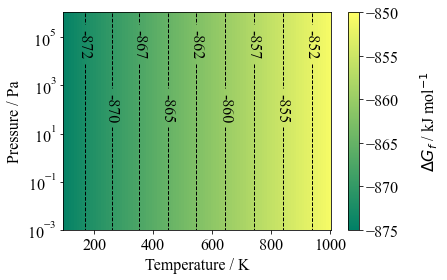

In [7]:
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-875,-850])

The above Gibbs formation energy is in the -9eV range, and shifts by an amount
(~25kJ) comparable to the CZTS study (~30kJ), with a weak dependence  on
Pressure, as expected.

## 2Ba+2Zr+3S2 <-> 2BaZrS3

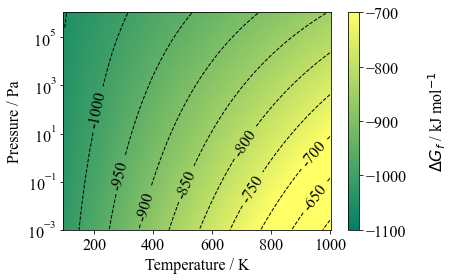

In [8]:
S2 = materials.IdealGas("S2",{'S':2},thermo_file="../BaZrS3/nist_janaf/S2.dat",energies={"pbesol":-0.217220682510473e05},zpe_pbesol=0.04421415)
S2_reaction = reactions.Reaction({Ba:2,Zr:2,S2:3},{BaZrS3:2},temperature=T,pressure=P,fu=2)
GFE = S2_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-1100, -700])

Again, there is agreement here with what would be expected from the CZTS
study. For the sulphur gas there is a greater variation with both
temperature and pressure. However it is stable in all regimes. In general
BaZrS3 shows increased stability compared to CZTS, which is to be expected
from previous reports.


# 8Ba + 8Zr + 3S8 <-> 8BaZrS3

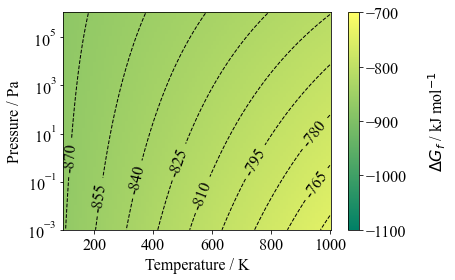

In [9]:
S8 = materials.IdealGas("S8",{'S':8},thermo_file="../BaZrS3/nist_janaf/S8"
                                                 ".dat",
                        energies={"pbesol":-86893.631040193},zpe_pbesol=0.32891037)
S8_reaction = reactions.Reaction({Ba:8,Zr:8,S8:3},{BaZrS3:8},temperature=T,
pressure=P,fu=8)
GFE = S8_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-1100, -700])

There is again a similar trend as to that seen for CZTS, with increased
stability of BaZrS3 in an S8 environment.


It would be nice to understand the different contributions that S2 and S8
make to the Gibbs formation energy - perhaps a plot with a breakdown of the
U, ST and PV terms would give greater insight.

# BaS + ZrS2 <-> BaZrS3

In [23]:
BaS_calc = calculations.Calculation(volume=0.632552E+02,energy=-235926.586148547, xc='pbesol',NAtoms=2)
ZrS2_calc = calculations.Calculation(volume=0.667493E+02,energy=-120454.748375135,xc='pbesol',NAtoms=3)
BaS = materials.Solid("BaS",{"Ba": 1, "S": 1},"../BaZrS3/phonopy_output/BaS_Fm-3m.dat",calculation=BaS_calc)
ZrS2 = materials.Solid("ZrS2",{"Zr": 1,"S": 2}, "../BaZrS3/phonopy_output/ZrS2_P-3m1.dat",calculation=ZrS2_calc)

In [11]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=0,pressure=0)
bulk_reaction.DH(units="eV").potential

-0.024347924685571343

The perovskite is not as stable against decomposition into binary phases as
expected. Previously reported energies are in the range -450 to -200 meV per fu (https://onlinelibrary.wiley.com/doi/full/10.1002/adom.202101704). The calculated has been verified by hand. If we do not include U_func (from the phonon calculation at T=0) then the calculated energy increases to -16.96meV.

Let's compare the calculated DFT energies to those on the materials project.

The uncorrected DFT energy for BaZrS3 (20 atoms) is -127.5651 eV. For BaS it is -10.2125 eV (2 atoms). For ZrS2 it is
-21.3614 eV (3 atoms). If we calculate the change in energy:

In [12]:
-10.2125 + -21.3614 - (-127.5651/4)

0.3173749999999984

Ok, so that is 317 meV which is much closer to that reported in the literature.

Furthermore, we can see that the energetics for the BaS and ZrS2 for our
study do not look quite correct. MP has BaS = -10.2125, ZrS2 = -21.3614. We
have BaS = -235926.586148547, ZrS2 = -120454.748375135.

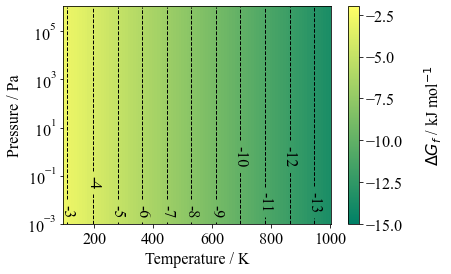

In [25]:
bulk_reaction = reactions.Reaction({BaS:1,ZrS2:1},{BaZrS3:1},temperature=T,
                                   pressure=P)
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-15, -2])

# BaS2 + ZrS <-> BaZrS3

Note that we are using the more stable of the ZrS compounds

In [13]:
BaS2_calc = calculations.Calculation(volume=0.168953E+03,energy=-493576.992662581, xc='pbesol',NAtoms=6)
ZrS_calc = calculations.Calculation(volume=0.691428E+02,energy=-219183.017830408,xc='pbesol',NAtoms=4)
BaS2 = materials.Solid("BaS2",{"Ba": 1, "S": 2},"."
                                               ""
                                               "./BaZrS3/phonopy_output/BaS2_C2_c.dat",calculation=BaS2_calc)
ZrS = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)

In [14]:
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=0,
                                   pressure=0)
bulk_reaction.DH(units="eV").potential

-1.3552561679389328

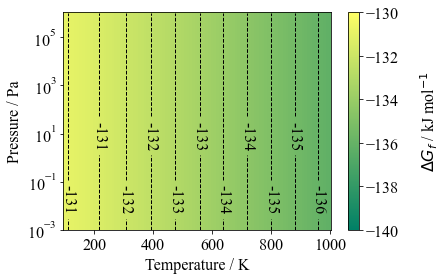

In [17]:
T = np.linspace(100,1000,100) # K
P = np.array( np.logspace(-3,6,100),ndmin=2).transpose() # Pa
bulk_reaction = reactions.Reaction({BaS2:1,ZrS:1},{BaZrS3:1},temperature=T, pressure=P)
GFE = bulk_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-140, -130])

The interesting thing here is that the material becomes more stable as the
temperature increases. This is opposite to the trends seen so far - can it
be reasoned using arguments from thermodynamics?

# 2BaS + 2ZrS + S2 <-> 2BaZrS3


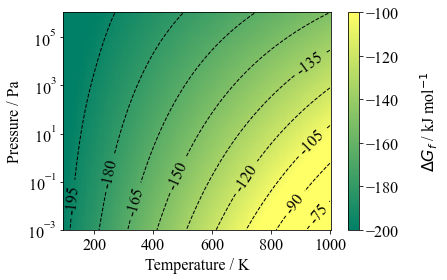

In [18]:
S2_binary_reaction = reactions.Reaction({BaS:2,ZrS:2,S2:1},{BaZrS3:2},
                                       temperature=T, pressure=P,fu=2)
GFE = S2_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-200, -100])

This is getting interesting now, as we are approaching a high temperature
regime where the perovskite might become unstable. Note that at high-T
sulphur gas is more likely found in the S2 allotrope (so at high T this
gives a better picture of the energetics when compared to S8).

# 8BaS + 8ZrS + S8 <-> 8BaZrS3

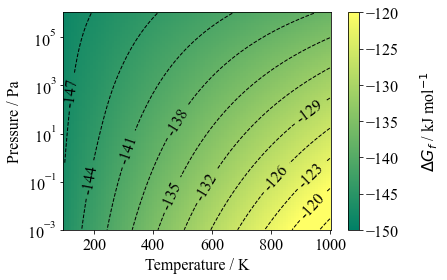

In [19]:
S8_binary_reaction = reactions.Reaction({BaS:8,ZrS:8,S8:1},{BaZrS3:8},
                                       temperature=T, pressure=P,fu=8)
GFE = S8_binary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-150, -120])

These results are consistent with the findings for decomposition into S8 and
 elemental phases. Similar behaviour to S2 but with lesser sensitivity to
 the T,P conditions.

# ZrS (Fm-3m) <-> ZrS (P4nmm)

In [26]:
ZrS_P4nmm = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_P4_nmm.dat",
                      calculation=ZrS_calc)
ZrS_Fm3m_calc = calculations.Calculation(volume=0.344611E+02, energy=-109591.347151412,
                                         xc="pbesol",NAtoms=2)
ZrS_Fm3m = materials.Solid("ZrS",{"Zr": 1,"S": 1}, "."
                                               ""
                                              "./BaZrS3/phonopy_output/ZrS_Fm-3m.dat",
                      calculation=ZrS_Fm3m_calc)

In [27]:
ZrS_reaction = reactions.Reaction({ZrS_Fm3m:1},{ZrS_P4nmm:1},
                                       temperature=T, pressure=P,fu=1)

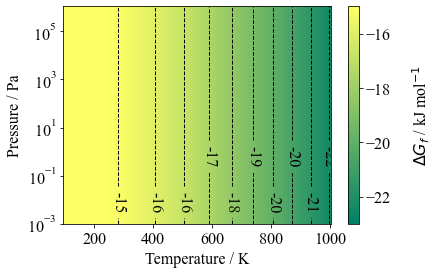

In [28]:
GFE = ZrS_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[-23, -15])

At all temperatures the ZrS_P4nmm polymorph is more stable.

# Ba3Zr2S7 + ZrS2 <-> 3BaZrS3

In [29]:
Ba3Zr2S7_calc = calculations.Calculation(volume=0.124269E+04, energy=-3794761.060664689,
                                         xc="pbesol",NAtoms=48)
Ba3Zr2S7 = materials.Solid("Ba3Zr2S7",{"Ba": 3,"Zr": 2,"S":7},
                           "../BaZrS3/phonopy_output/Ba3Zr2S7_P4_2_mnm.dat",
                           calculation=Ba3Zr2S7_calc)

In [30]:
ternary_reaction = reactions.Reaction({Ba3Zr2S7:1,ZrS2:1},{BaZrS3:3},
                                      temperature=T, pressure=P, fu=3)

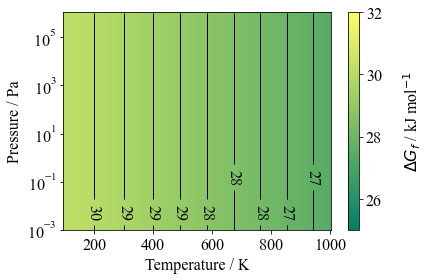

In [31]:
GFE = ternary_reaction.Dmu(units="kJ")
GFE.plot_TvsP(scale_range=[25, 32])

# 3BaZrS3 <->  Ba3Zr2S7 + ZrS2

In [32]:
ternary_reaction = reactions.Reaction({BaZrS3:3},{Ba3Zr2S7:1,ZrS2:1},fu=3)
ternary_reaction.Dmu(units="eV").potential

-0.30795514583587646

In [33]:
ternary_reaction = reactions.Reaction({BaZrS3:1},{Ba3Zr2S7:1/3,ZrS2:1/3},fu=1)
ternary_reaction.Dmu(units="eV").potential

-0.30795514571946114

In [34]:
ternary_reaction = reactions.Reaction({BaZrS3:1},{Ba3Zr2S7:1/3,ZrS2:1/3},
                                      fu=1,temperature=0,pressure=0)
ternary_reaction.DH(units="eV").potential

-0.313067136448808

Quite unexpected results!

Degradation into the RP phase isn't reported however it is expected that
there would be significant kinetic barriers for forming this phase.

The results are somewhat in line with what Scragg et al report (https://pubs
.acs.org/doi/10.1021/acsaem.2c00704) - that BaZrS3 crystallisation from
sulphur-containing precursors (Ba-Zr-S) is not possible, whilst xtalisation
is possible from Ba-Zr precursors.

# Ba3Zr2S7  <-> 3BaS + 2ZrS +S2


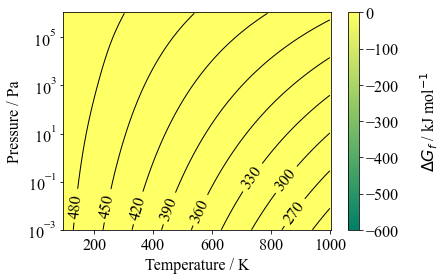

In [35]:
ternary_gas_reaction = reactions.Reaction({Ba3Zr2S7:1},{BaS:3,ZrS:2,S2:1},
                                      temperature=T, pressure=P, fu=1)
GFE = ternary_gas_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# BaS + S2 <-> BaS3

In [36]:
BaS3_calc = calculations.Calculation(volume=0.188541E+03,energy=-515300.801230511, xc="pbesol",NAtoms=8)
BaS3 = materials.Solid("BaS3",{"Ba": 1,"S":3},
                           "../BaZrS3/phonopy_output/BaS3_P-42_1m.dat",
                           calculation=BaS3_calc)

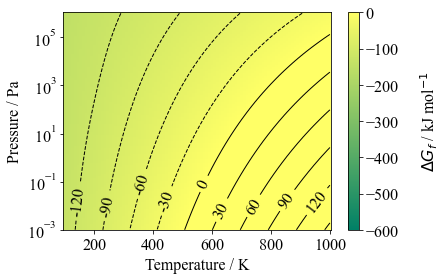

In [38]:

T = np.linspace(100, 1000, 100)  # K
P = np.array(np.logspace(-3, 6, 100), ndmin=2).transpose()  # Pa
Ba_S_reaction = reactions.Reaction({BaS:1,S2:1},{BaS3:1},temperature=T,
                                   pressure=P)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 4BaS + S8 <-> 4BaS3

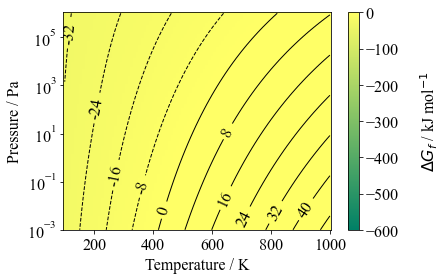

In [41]:
Ba_S_reaction = reactions.Reaction({BaS:4,S8:1},{BaS3:4},temperature=T,
                                   pressure=P,fu=4)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

Ok, so this is interesting! BaS3 is formed below ~700K. Above
this value it is not energetically favourable to form BaS3.

Another thing to note is that BaS3 has a melting point of 554 °C.

As we increase the partial pressure of sulphur the formation of BaS3 becomes
more favourable.

# 2Ba + 3S2 <-> 2BaS3



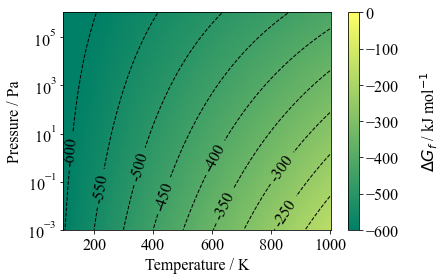

In [42]:
Ba_S_reaction = reactions.Reaction({Ba: 2, S2: 3}, {BaS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 8Ba + 3S8 <-> 8BaS3

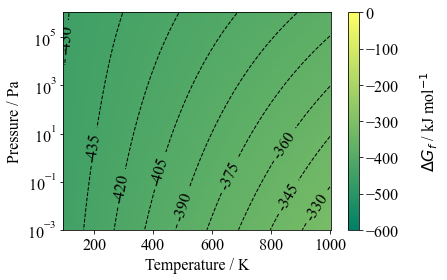

In [43]:
Ba_S_reaction = reactions.Reaction({Ba: 8, S8: 3}, {BaS3: 8}, temperature=T,
                                   pressure=P,fu=8)
GFE = Ba_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# ZrS + S2 <-> ZrS3

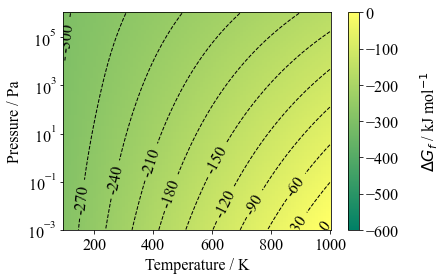

In [44]:
ZrS3_calc = calculations.Calculation(volume=0.164584E+03,
                                     energy=-262633.853463458, xc="pbesol",
                                     NAtoms=8)
ZrS3 = materials.Solid("ZrS3", {"Zr": 1, "S": 3},
                       "../BaZrS3/phonopy_output/ZrS3_P2_1m.dat",
                       calculation=ZrS3_calc)
Zr_S_reaction = reactions.Reaction({ZrS: 1, S2: 1}, {ZrS3: 1}, temperature=T,
                                   pressure=P)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 8ZrS +2S8 <-> 8ZrS3

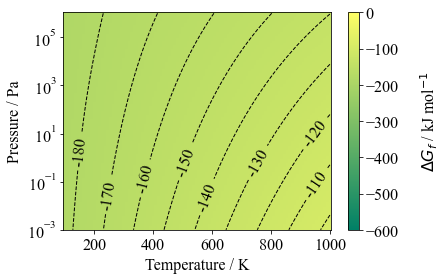

In [46]:


Zr_S_reaction = reactions.Reaction({ZrS: 8, S8: 2}, {ZrS3: 8}, temperature=T,
                                   pressure=P,fu=8)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2ZrS + S2 <-> 2ZrS2

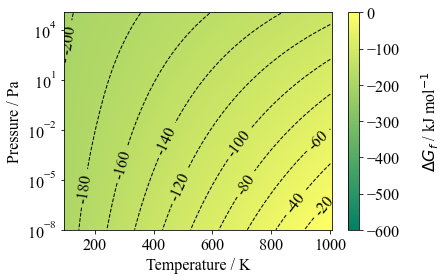

In [92]:
Zr_S_reaction = reactions.Reaction({ZrS: 2, S2: 1}, {ZrS2: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2Zr +  3S2 <-> 2ZrS3

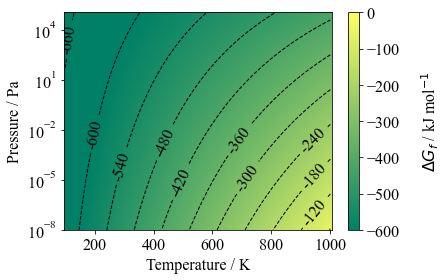

In [93]:
Zr_S_reaction = reactions.Reaction({Zr: 2, S2: 3}, {ZrS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# Zr + S2 <-> ZrS2

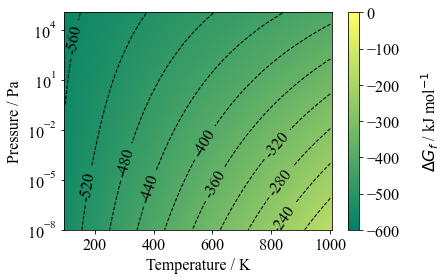

In [94]:
Zr_S_reaction = reactions.Reaction({Zr: 1, S2: 1}, {ZrS2: 1}, temperature=T,
                                   pressure=P,fu=1)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 2ZrS2 + S2 <-> 2ZrS3

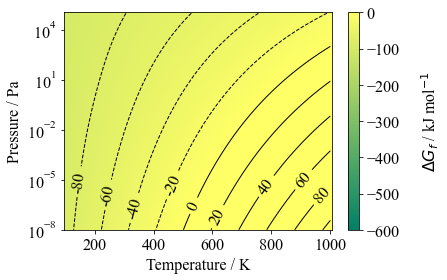

In [95]:
Zr_S_reaction = reactions.Reaction({ZrS2: 2, S2: 1}, {ZrS3: 2}, temperature=T,
                                   pressure=P,fu=2)
GFE = Zr_S_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# BaS3 + ZrS2  <->  BaZrS3 +  S2

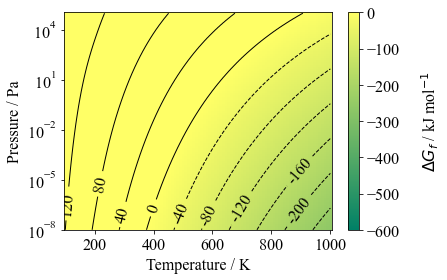

In [91]:
BaZrS3_S2_reaction = reactions.Reaction( {BaS3: 1, ZrS2:1},{BaZrS3: 1, S2: 1},
                                       temperature=T,
                                   pressure=P,fu=1)
GFE = BaZrS3_S2_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

# 4BaS3 + 4ZrS2 <-> 4BaZrS3 + S8

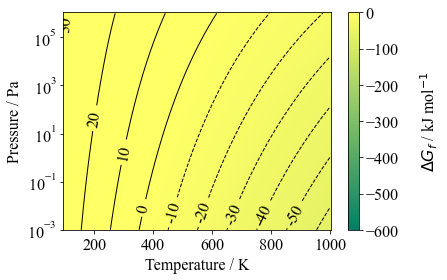

In [51]:
BaZrS3_S8_reaction = reactions.Reaction( {BaS3: 4, ZrS2:4},{BaZrS3: 4, S8: 1},
                                       temperature=T,
                                   pressure=P,fu=4)
GFE = BaZrS3_S8_reaction.Dmu(units="kJ")
GFE.plot_TvsP()

Ok, so this looks promising for comparison with experimental results...

# Experimental results

- BaS and Zr targets were used to deposit amorphous Ba–Zr–S films by reactive
 co-sputtering in the presence of H2S. These precursors were then annealed in an inert atmosphere for crystallization. The optimal temperature to form BaZrS3 was found to be around 900 °C.

- A related case is the work by Yu et al, (31) who fabricated Ba–Zr–S layers by pulsed laser deposition (PLD). Interestingly, even with a substrate temperature as high as 700 °C in the PLD step, the as-deposited films turned out amorphous and highly sulfur-deficient.

- Wang et al. succeeded in synthesizing BaZrS3 at temperatures as low as 500
°C by solid-state reaction. They demonstrated that an overstoichiometric
quantity of S played crucial role in formation─specifically, a certain,
small S excess was required for smooth phase formation at a lower
temperature.  The addition of too little S led solely to the formation of
the binary compounds BaS, BaS2, and ZrS2, while a too large S excess
produced mainly BaS3 and ZrS3.

-  Scragg et al: In qualitative agreement with Wang et al. for a very
different type of process, (36) the behavior seen in Figure 2a confirms that a certain, defined S excess is required for smooth phase formation at moderate temperatures when starting from elemental precursors.

This previous point in conjunction with our results seems to suggest that we
 do not want BaS3 formation.